 
# <center> #DHBSI 2016: Computational Text Analysis </center>

## <center> Laura Nelson <br/> <em>Postdoctoral Fellow | Digital Humanities @ Berkeley | Berkeley Institute for Data Science </em> </center>

## <center> Teddy Roland <br/> <em> Coordinator, Digital Humanities @ Berkeley <br/> Lecturer, UC Berkeley </em> </center>

# <center> Summary </center>
## <center> Text Analysis Demystified </center>
### <center> It's Just Counting! <br/> </center>
![Counting](Text_Counting.jpg)

## <center> The Dark Side of DH: An Invitation
![Dark Side](Dark_Side.jpg)

## <center> Text Analysis in Research </center>
![Interpretive Moments](Text_Analysis_In_Reearch.jpg)

## <center> Lessons </center>
### <center> Our workshop included 5 days and 7 lessons to learn how counting, sometimes creative counting, can amplify and augment close readings of text </center>

# Lesson 1: Introduction to Natural Language Processing

In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
punctuations = list(string.punctuation)

#read the two text files from your hard drive, assign first mystery text to variable 'text1' and second mystery text to variable 'text2'
text1 = open('../01-Intro-to-NLP/text1.txt').read()
text2 = open('../01-Intro-to-NLP/text2.txt').read()

###word frequencies

#tokenize texts
text1_tokens = word_tokenize(text1)
text2_tokens = word_tokenize(text2)

#pre-process for word frequency
#lowercase
text1_tokens_lc = [word.lower() for word in text1_tokens]
text2_tokens_lc = [word.lower() for word in text2_tokens]

#remove stopwords
text1_tokens_clean = [word for word in text1_tokens_lc if word not in stopwords.words('english')]
text2_tokens_clean = [word for word in text2_tokens_lc if word not in stopwords.words('english')]

#remove punctuation using the list of punctuation from the string pacage
text1_tokens_clean = [word for word in text1_tokens_clean if word not in punctuations]
text2_tokens_clean = [word for word in text2_tokens_clean if word not in punctuations]

#frequency distribution
text1_word_frequency = nltk.FreqDist(text1_tokens_clean)
text2_word_frequency = nltk.FreqDist(text2_tokens_clean)



print("Frequent Words for Text1")
print("________________________")
for word in text1_word_frequency.most_common(20):
    print(word[0])
print()
print("Frequent Words for Text2")
print("________________________")
for word in text2_word_frequency.most_common(20):
    print(word[0])
    
    
## Can you guess the novel from most frequent words?

Frequent Words for Text1
________________________
's
''
``
whale
one
like
upon
ahab
man
ship
old
would
ye
sea
though
yet
time
captain
long
still

Frequent Words for Text2
________________________
''
``
's
elinor
could
marianne
mrs.
would
said
every
one
much
must
sister
edward
dashwood
mother
time
jennings
know


# Lesson 2: Basics of Python

In [ ]:
# Nothing to see here, folks

# Lesson 3: Operationalizing

Populating the interactive namespace from numpy and matplotlib


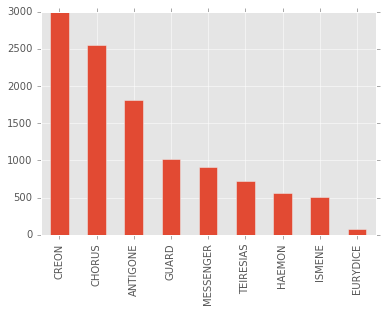

In [2]:
import pandas
dialogue_df = pandas.read_csv('../03-Operationalizing/antigone_dialogue.csv', index_col=0)
dialogue_tokens = [character.split() for character in dialogue_df['DIALOGUE']]
dialogue_len = [len(tokens) for tokens in dialogue_tokens]
dialogue_df['WORDS_SPOKEN'] = dialogue_len
dialogue_df = dialogue_df.sort_values('WORDS_SPOKEN', ascending = False)
# Let's visualize!

# Tells Jupyter to produce images in notebook
% pylab inline

# Makes images look good
style.use('ggplot')
dialogue_df['WORDS_SPOKEN'].plot(kind='bar')

## Who is the main protagonist? Maybe not Antigone?

# Lesson 4: Discriminating Words

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = pandas.read_csv("../04-Discriminating-Words/BDHSI2016_music_reviews.csv", sep = '\t')

tfidfvec = TfidfVectorizer()
#create the dtm, but with cells weigthed by the tf-idf score.
dtm_tfidf_df = pandas.DataFrame(tfidfvec.fit_transform(df.body).toarray(), columns=tfidfvec.get_feature_names(), index = df.index)

df_genre = df['genre'].to_frame()
merged_df = df_genre.join(dtm_tfidf_df, how = 'right', lsuffix='_x')

#pull out the reviews for three genres, Rap, Alternative/Indie Rock, and Jazz
dtm_rap = merged_df[merged_df['genre_x']=="Rap"]
dtm_indie = merged_df[merged_df['genre_x']=="Alternative/Indie Rock"]
dtm_jazz = merged_df[merged_df['genre_x']=="Jazz"]

#print the words with the highest tf-idf scores for each genre
print("Rap Words")
print(dtm_rap.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("Indie Words")
print(dtm_indie.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("Jazz Words")
print(dtm_jazz.max(numeric_only=True).sort_values(ascending=False)[0:20])

## What words are distinct to reviews of Rap albums, Indie albums, and Jazz albums?
## Notice the word weights for the Rap albums compared to others. Are these reviews more different than other reviews?

Rap Words
blank             0.854475
039               0.797595
waste             0.755918
amiable           0.730963
awesomely         0.717079
same              0.672391
sucker            0.663760
tight             0.653993
beastie           0.650603
lamest            0.639377
derivativeness    0.636271
authentic         0.627192
diverse           0.623373
sermon            0.621175
mastermind        0.609213
neat              0.608922
we                0.600755
lift              0.591821
supreme           0.590431
overwhelms        0.586293
dtype: float64

Indie Words
underplayed    0.516717
prisoner       0.512087
jezabels       0.512087
careworn       0.509386
folk           0.476719
victory        0.449289
exhausted      0.445969
bigger         0.441849
heyday         0.438114
babelfished    0.431543
bet            0.426091
worn           0.416482
93             0.416137
try            0.415525
triumph        0.413976
silhouette     0.413374
icelandic      0.411715
fourth        

# Lesson 5: Sentiment Analysis using the Dictionary Method

In [4]:
pos_sent = open("../05-Dictionary-Method/positive_words.txt").read()
neg_sent = open("../05-Dictionary-Method/negative_words.txt").read()

positive_words=pos_sent.split('\n')
negative_words=neg_sent.split('\n')

text1_pos = [word for word in text1_tokens_clean if word in positive_words]
text2_pos = [word for word in text2_tokens_clean if word in positive_words]

text1_neg = [word for word in text1_tokens if word in negative_words]
text2_neg = [word for word in text2_tokens if word in negative_words]

print("Postive words in Melville")
print(len(text1_pos)/len(text1_tokens))
print()
print("Negative words in Melville")
print(len(text1_neg)/len(text1_tokens))
print()
print("Postive words in Austen")
print(len(text2_pos)/len(text2_tokens))
print()
print("Negative words in Austen")
print(len(text2_neg)/len(text2_tokens))

## Who is more postive, Melville or Austen?
## Melville has a similar precentage of postive and negative words (a whale is a whale, neither good nor bad)
## Austen is decidedly more positive than negative (it's the gentleman thing to do)

Postive words in Melville
0.029168530607558956

Negative words in Melville
0.026670519910847543

Postive words in Austen
0.045986304996458185

Negative words in Austen
0.025701385957254987


# Lesson 6: Literary Distinction

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import os

review_path = '../06-Literary Distinction (Probably)/poems/reviewed/'
random_path = '../06-Literary Distinction (Probably)/poems/random/'
review_files = os.listdir(review_path)
random_files = os.listdir(random_path)
review_texts = [open(review_path+file_name).read() for file_name in review_files]
random_texts = [open(random_path+file_name).read() for file_name in random_files]
all_texts = review_texts + random_texts
all_file_names = review_files + random_files
all_labels = ['reviewed'] * len(review_texts) + ['random'] * len(random_texts)
cv = CountVectorizer(stop_words = 'english', min_df=180, binary = True, max_features = None)
dtm = cv.fit_transform(all_texts).toarray()
nb = MultinomialNB()
nb.fit(dtm, all_labels)

dickinson_canonic = """Because I could not stop for Death – 
He kindly stopped for me –  
The Carriage held but just Ourselves –  
And Immortality.

We slowly drove – He knew no haste
And I had put away
My labor and my leisure too,
For His Civility – 

We passed the School, where Children strove
At Recess – in the Ring –  
We passed the Fields of Gazing Grain –  
We passed the Setting Sun – 

Or rather – He passed us – 
The Dews drew quivering and chill – 
For only Gossamer, my Gown – 
My Tippet – only Tulle – 

We paused before a House that seemed
A Swelling of the Ground – 
The Roof was scarcely visible – 
The Cornice – in the Ground – 

Since then – ‘tis Centuries – and yet
Feels shorter than the Day
I first surmised the Horses’ Heads 
Were toward Eternity – """


anthem_patriotic = """O! say can you see, by the dawn's early light,
What so proudly we hailed at the twilight's last gleaming,
Whose broad stripes and bright stars through the perilous fight,
O'er the ramparts we watched, were so gallantly streaming?
And the rockets' red glare, the bombs bursting in air,
Gave proof through the night that our flag was still there;
O! say does that star-spangled banner yet wave
O'er the land of the free and the home of the brave?"""

unknown_dtm = cv.transform([dickinson_canonic,anthem_patriotic]).toarray()
nb.predict(unknown_dtm)

## Can a computer predict whether a poem would be considered 'presitgious'?

array(['reviewed', 'random'], 
      dtype='<U8')

# Lesson 6: Topic Modeling

In [6]:
import gensim
import pandas
from nltk.corpus import stopwords, words

metadata_df = pandas.read_csv('../07-Topic Modeling/txtlab_Novel150_English.csv')
fiction_path = '../07-Topic Modeling/txtalb_Novel150_English/'
novel_list = [open(fiction_path+file_name).read() for file_name in metadata_df['filename']]
novel_tokens_list = [novel.lower().split() for novel in novel_list]
dictionary = gensim.corpora.dictionary.Dictionary(novel_tokens_list)
proper_names = [word.lower() for word in words.words() if word.istitle()]
noise_tokens = [word for word in dictionary.values() if word.isalpha()==False or len(word)<=2]
bad_words = stopwords.words('english') + proper_names + noise_tokens
stop_ids = [_id for _id, count in dictionary.doc2bow(bad_words)]
dictionary.filter_tokens(bad_ids = stop_ids)
dictionary.filter_extremes(no_below = 40)
corpus = [dictionary.doc2bow(text) for text in novel_tokens_list]
lda_model = gensim.models.LdaModel(corpus, num_topics=25, alpha='auto', id2word=dictionary, iterations=2500, passes = 4)
list_of_doctopics = [lda_model.get_document_topics(text, minimum_probability=0) for text in corpus]
list_of_probabilities = [[probability for label,probability in distribution] for distribution in list_of_doctopics]
proba_distro_df = pandas.DataFrame(list_of_probabilities)
metadata_df = pandas.concat([metadata_df, pandas.DataFrame(list_of_probabilities)], axis=1)
annual_means_df = metadata_df.groupby('date').mean()

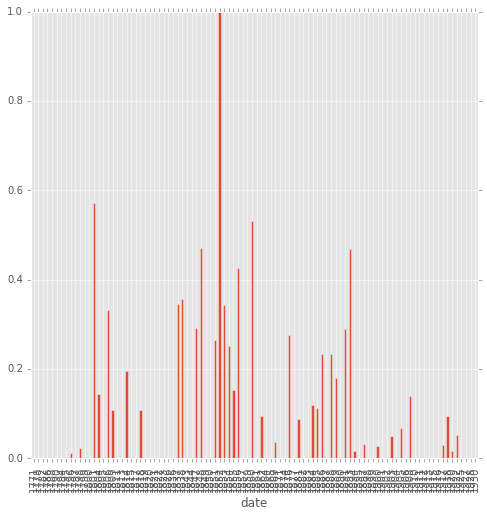

In [7]:
annual_means_df[8].plot(kind='bar', figsize=(8,8))

In [8]:
lda_model.show_topic(8)

[('whilst', 0.0031419899101017678),
 ('colonel', 0.0030444900346714454),
 ('mamma', 0.002115125640041903),
 ('papa', 0.0015776669428537301),
 ('respecting', 0.0014910253780455484),
 ('niece', 0.0013964800259173716),
 ('behaviour', 0.0013867123154470494),
 ('madame', 0.0013695745918571331),
 ('quitted', 0.0013646269767377441),
 ('neighbours', 0.0013456992893605742)]